In [1]:
import os
import random
from datetime import datetime 

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [2]:
%reload_ext autoreload
%autoreload 2

# Обработка датасета

In [138]:
data = pd.read_csv("breast_cancer.csv")

data["diagnosis"] = data["diagnosis"].replace({"M": -1, "B": 1})
data = data.drop(["id", "Unnamed: 32"], axis=1)
data.head(5)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_15740\439020101.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"] = data["diagnosis"].replace({"M": -1, "B": 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [139]:
Y = data["diagnosis"]
X = data.drop(["diagnosis"], axis=1)

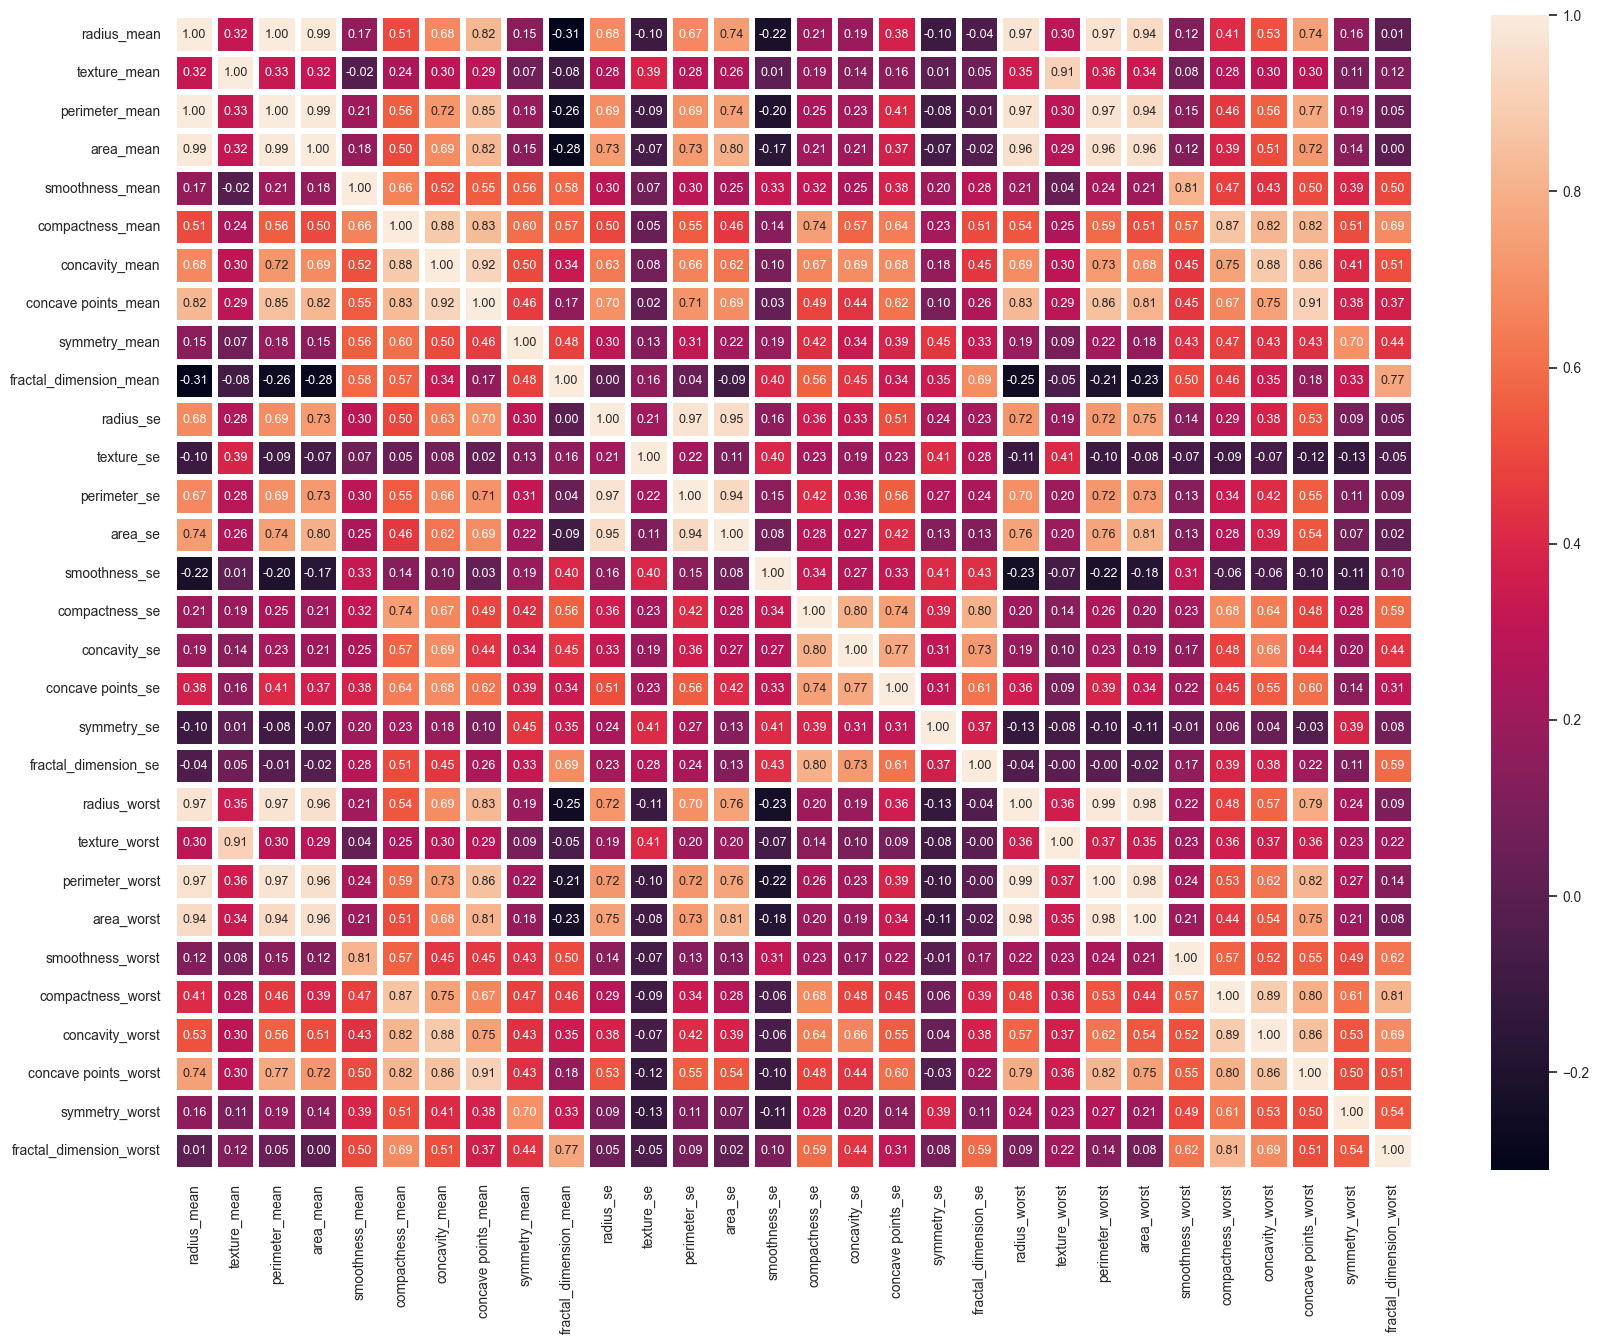

In [104]:
import seaborn as sns

sns.heatmap(X.corr(), annot=True, linewidths=3, fmt=".2f", annot_kws={'size': 9}, xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(20, 15)

In [140]:
problematic_columns = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
                       'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst',
                       
                       'radius_worst', 'texture_worst',
                        'smoothness_worst', 'compactness_worst', 'symmetry_worst',
                        'fractal_dimension_worst',

                        'radius_se', 'compactness_se', 'fractal_dimension_se',
                        ]

X = X.drop(problematic_columns, axis=1)

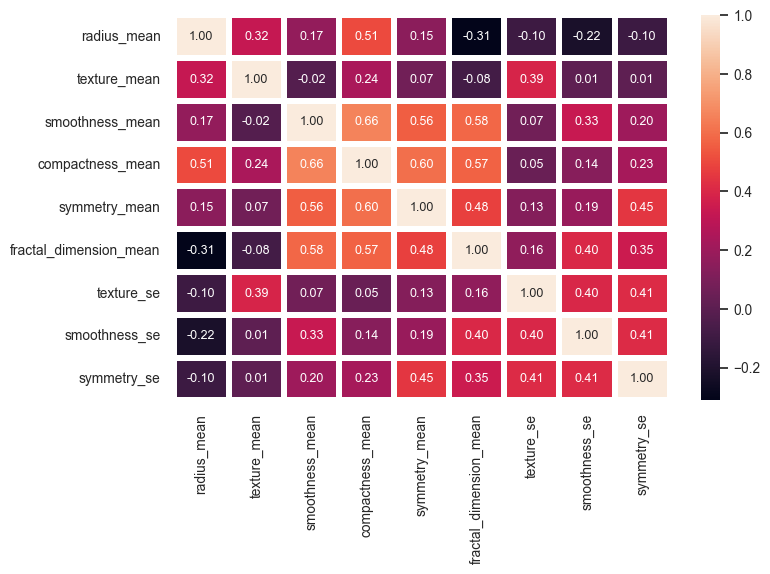

In [141]:
sns.set_theme(font_scale=0.9)
sns.heatmap(X.corr(), annot=True, linewidths=3, fmt=".2f", annot_kws={'size': 9}, xticklabels=True, yticklabels=True)
plt.gcf().set_size_inches(8, 5)

In [143]:
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se',
       'smoothness_se', 'symmetry_se'],
      dtype='object')

In [144]:
sc = MinMaxScaler()
columns = list(X.columns)
X[columns] = sc.fit_transform(X[columns])

Y = Y.to_numpy().reshape(-1, )
X = X.to_numpy()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 9), (398,), (171, 9), (171,))

In [146]:
np.unique(y_test, return_counts=True)

(array([-1,  1], dtype=int64), array([ 68, 103], dtype=int64))

In [ ]:
N = 398

idxs = np.random.choice(np.arange(len(X_train)), N, replace=False)
X_sample = X_train[idxs]
y_sample = y_train[idxs]

print("Shapes of sample:", X_sample.shape, y_sample.shape)
np.unique(y_sample, return_counts=True)

Shapes of sample: (398, 9) (398,)


(array([-1,  1], dtype=int64), array([144, 254], dtype=int64))

# Двойственная задача

In [ ]:
from svm import SVM
from sklearn.svm import SVC

import matplotlib.colors as pltcolors
cmap = pltcolors.ListedColormap(['blue', 'red'])

In [296]:
def plot_svm(X_train, y_train, sv, title):
    fig, ax = plt.subplots(2, 3, figsize=(13, 10))

    idxs = ([0, 1], [2, 3], [4, 5], [6, 7], [0, 8], [1, 2])
    for i, ax in enumerate(ax.flatten()):
        ax.scatter(X_train[:, idxs[i][0]], X_train[:, idxs[i][1]], c=y_train, cmap=cmap, edgecolors='k')
        ax.scatter(sv[:, idxs[i][0]], sv[:, idxs[i][1]], label='SupportVector', s=70, marker='s', linewidth=2, facecolors='none',
                    edgecolors='k')
        
        ax.set_ylabel(f"Feature {idxs[i][1]}")
        ax.set_xlabel(f"Feature {idxs[i][0]}")
    fig.suptitle(title, y=0.9)
    plt.savefig(f"{title}_features.png", bbox_inches='tight')
    plt.show()

In [303]:
from sklearn.manifold import TSNE

def plot_tsne(X, y, model, title):
    tsne = TSNE(n_components=2)
    XX_tsne = tsne.fit_transform(X)
    plt.scatter(XX_tsne[:, 0], XX_tsne[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.scatter(XX_tsne[model.idxs, 0], XX_tsne[model.idxs, 1], marker='o', s=70, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.savefig(f"{title}_tsne.png", bbox_inches='tight')
    plt.show()


### Линейное ядро

In [364]:
model = SVM(kernel_type="linear", C=5)
res = model.fit(X_sample, y_sample)

Optimization result: Optimization terminated successfully, status 0


In [365]:
y_res = model.predict(X_test)
print(classification_report(y_test, y_res))

              precision    recall  f1-score   support

          -1       0.88      0.99      0.93        68
           1       0.99      0.91      0.95       103

    accuracy                           0.94       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



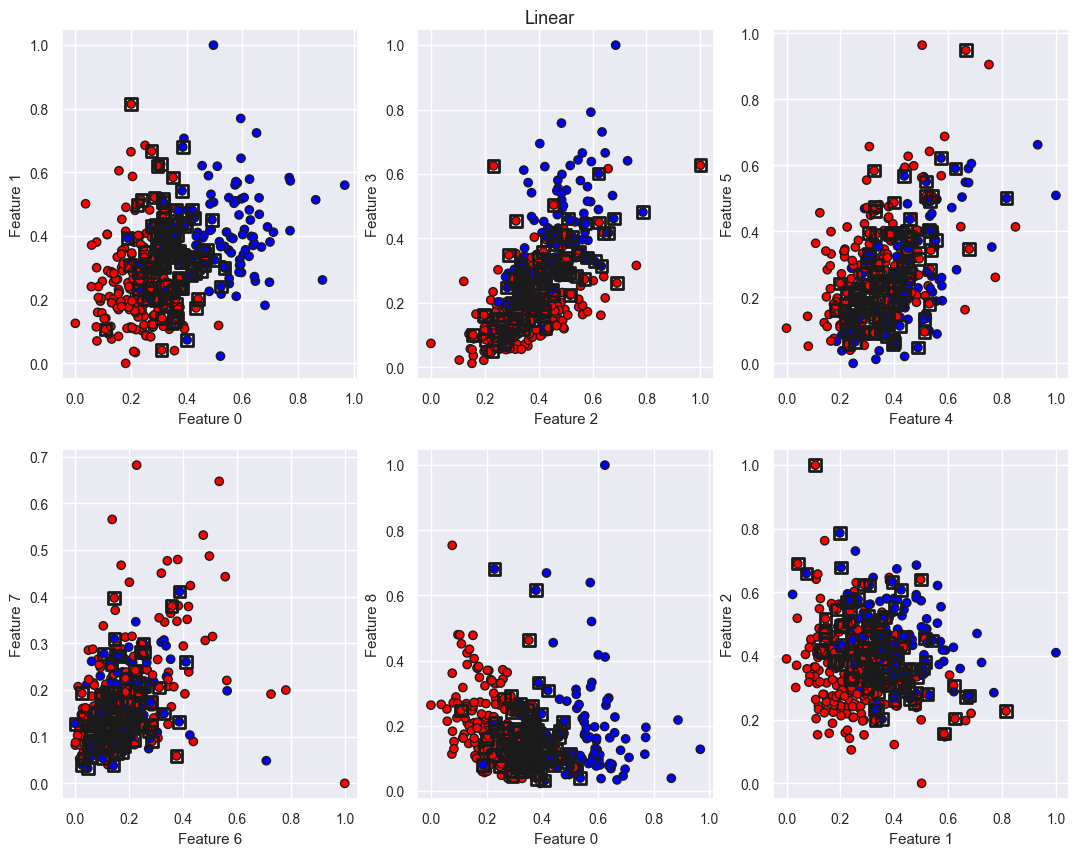

In [366]:
plot_svm(X_train, y_train, model.support_vectors, title="Linear")

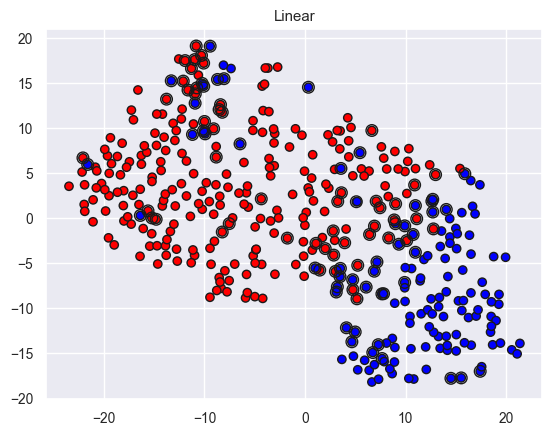

In [367]:
plot_tsne(X_sample, y_sample, model, title="Linear")

#### Эталонное решение

In [368]:
svm = SVC(kernel='linear', random_state=0, C=5)
svm.fit(X_sample, y_sample)
y_res = svm.predict(X_test)
print(classification_report(y_test, y_res))

              precision    recall  f1-score   support

          -1       0.89      0.94      0.91        68
           1       0.96      0.92      0.94       103

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [371]:
len(svm.support_vectors_), len(model.support_vectors)


(99, 99)

## RBF

In [372]:
model = SVM(kernel_type="rbf", C=1)
res = model.fit(X_sample, y_sample)
res

Optimization result: Optimization terminated successfully, status 0


True

In [373]:
y_res_rbf = model.predict(X_test)
print(classification_report(y_test, y_res_rbf))

              precision    recall  f1-score   support

          -1       0.91      0.99      0.94        68
           1       0.99      0.93      0.96       103

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



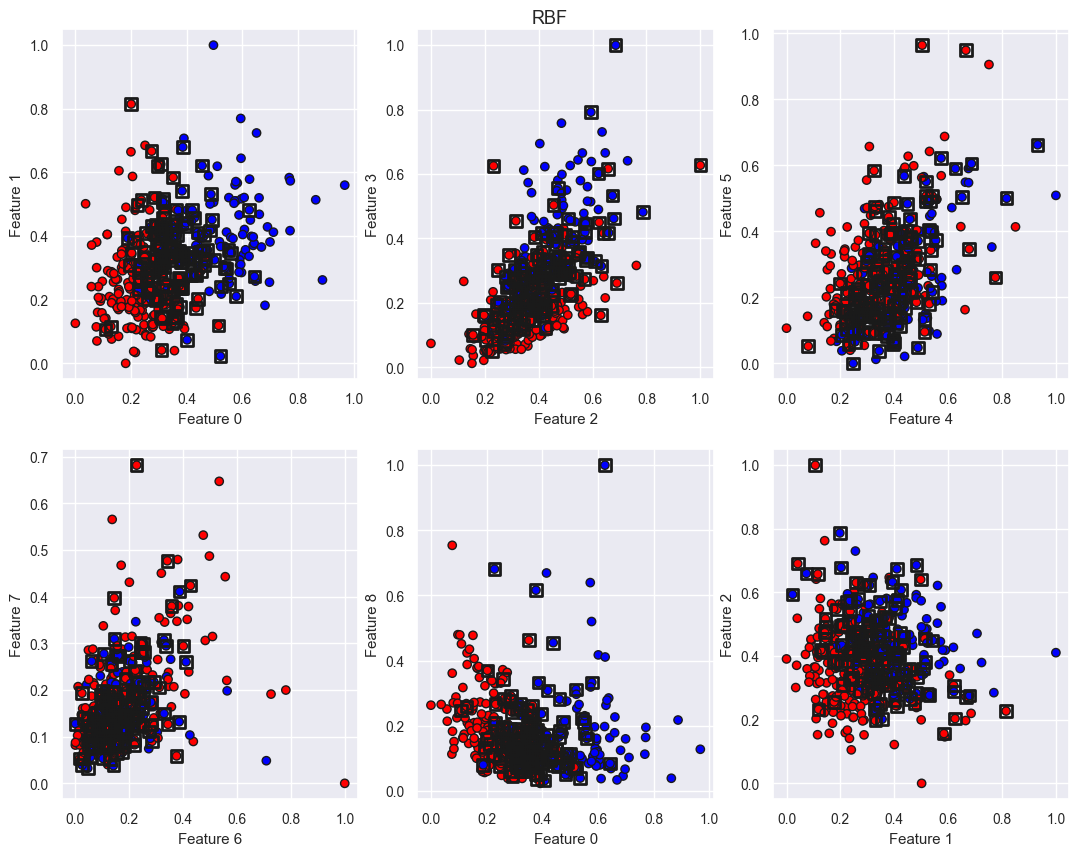

In [374]:
plot_svm(X_train, y_train, model.support_vectors, title="RBF")

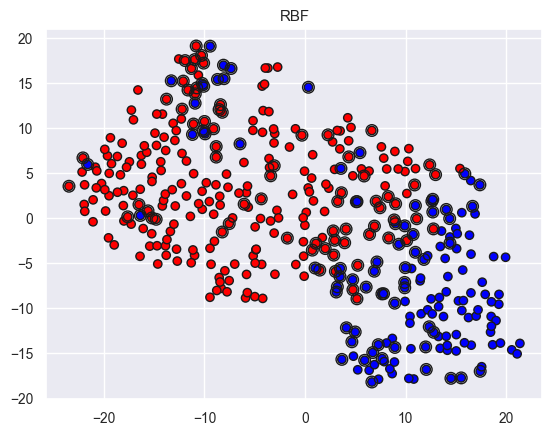

In [375]:
plot_tsne(X_sample, y_sample, model, title="RBF")

#### Эталонное решение

In [376]:
svm = SVC(kernel='rbf', gamma=0.8, random_state=0)
svm.fit(X_sample, y_sample)
y_res = svm.predict(X_test)
print(classification_report(y_test, y_res))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91        68
           1       0.93      0.95      0.94       103

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [377]:
len(svm.support_vectors_), len(model.support_vectors)

(136, 136)

## Polynomial

In [378]:
model = SVM(kernel_type="poly", C=5, d=3)
res = model.fit(X_sample, y_sample)
res

Optimization result: Optimization terminated successfully, status 0


True

In [379]:
y_res_poly = model.predict(X_test)
print(classification_report(y_test, y_res_poly))

              precision    recall  f1-score   support

          -1       0.91      0.99      0.94        68
           1       0.99      0.93      0.96       103

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



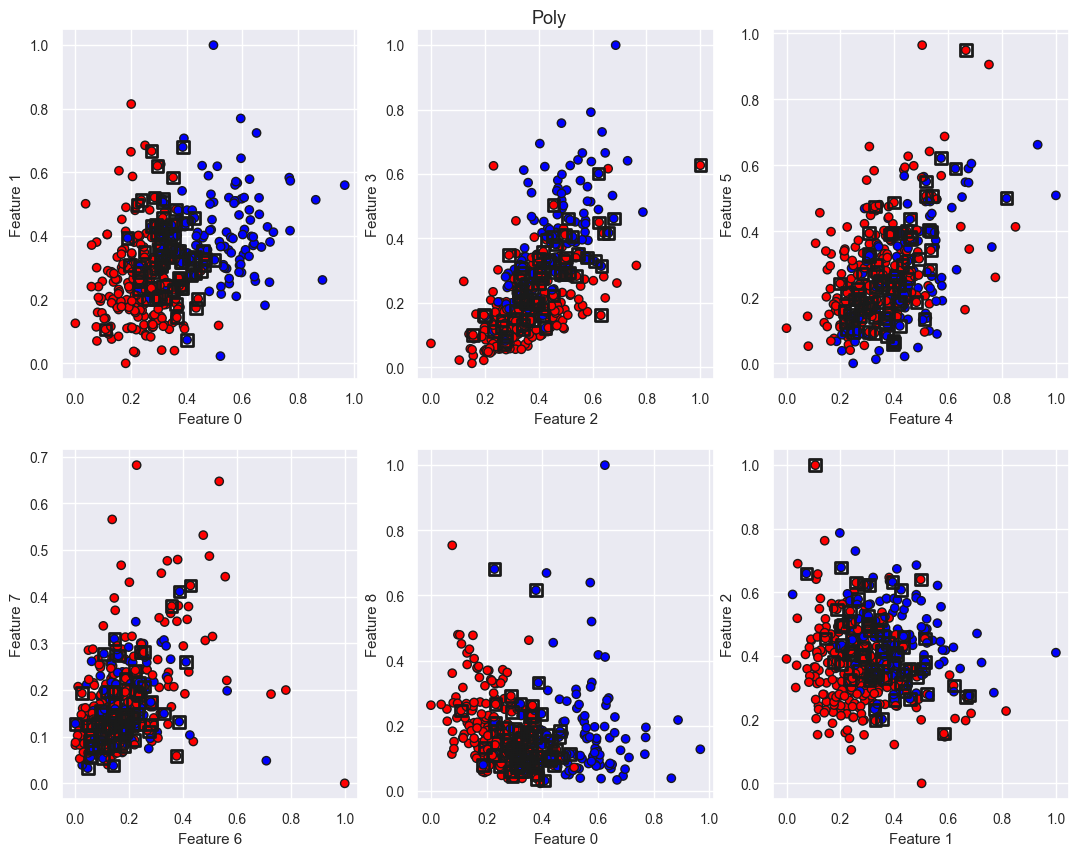

In [380]:
plot_svm(X_train, y_train, model.support_vectors, title="Poly")


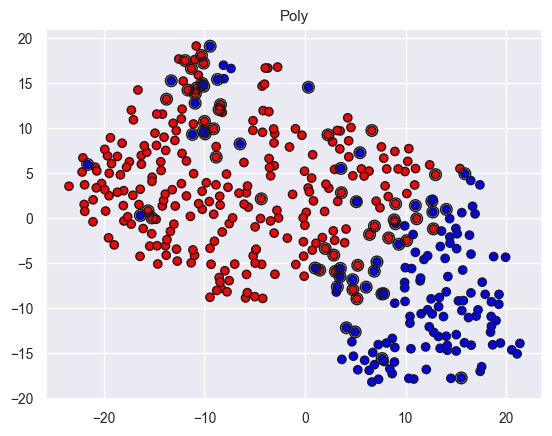

In [381]:
plot_tsne(X_sample, y_sample, model, title="Poly")

#### Эталонное решение

In [382]:
svm = SVC(kernel='poly', C=5, degree=3, random_state=0)
svm.fit(X_sample, y_sample)
y_res = svm.predict(X_test)
print(classification_report(y_test, y_res))

              precision    recall  f1-score   support

          -1       0.90      0.91      0.91        68
           1       0.94      0.93      0.94       103

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [383]:
len(svm.support_vectors_), len(model.support_vectors)

(68, 72)